Artificial Intelligence Master's Degree (2022 - 2023)

Natural Language Processing

# **Part-of-Speech Tagging with Recurrent Neural Architectures**


## Abstract

This notebook explores the natural language processing task of sequence labelling. In particular, it examines the English parts of speech and implements a parts-of-speech tagger using recurrent neural network architectures trained on the Penn Treebank dataset.

More specifically, the following four RNNs were examined:
- `BiLSTM` + `FC` (Baseline)
- `BiGRU` + `FC`
- `BiLSTM` + `BiLSTM` + `FC`
- `BiLSTM` + `FC`+ `FC`

All models performed comparably on the validation set. The best two models were evaluated on the test set. Finally, the notebook performs error analysis on the models' predictions to gain further insight on their limitations and possible improvements. 

## Table of Contents

>[Part-of-Speech Tagging with Recurrent Neural Architectures](#scrollTo=O10iUIGXXXXV)

>>[Abstract](#scrollTo=Nixn7Hp-XYPH)

>>[Table of Contents](#scrollTo=UPAF3hlq0YZG)

>>[Background](#scrollTo=NU49J3Bm0YO2)

>>>[Sequence Labelling](#scrollTo=sOw0b4Yo0weg)

>>>[English Parts-of-Speech](#scrollTo=3rTouM9E00md)

>>>[Parts-of-Speech Tagging](#scrollTo=CcRKI5rW01VS)

>>>>[The Penn Treebank Tagset](#scrollTo=K8M1OHeb1RzR)

>>[Implementation of a PoS Tagger](#scrollTo=CuyHjbbF1bic)

>>>[Imports](#scrollTo=PQJZpgXpRaGR)

>>>[Downloading the Dataset](#scrollTo=d9pHsqV3No5r)

>>>[Loading the Dataset into a Dataframe](#scrollTo=Zx8mPj8SNotU)

>>>[Dataframe Exploration](#scrollTo=Dihp4V_7Noj9)

>>>[Text Vectorization](#scrollTo=XgfEA96KNnrP)

>>>>[Initialization](#scrollTo=Js5a4qEsCA5g)

>>>>[Examples](#scrollTo=2eDWa8HLCUZI)

>>>>[Training Set](#scrollTo=iUf-LEPVCgy6)

>>>>[Validation Set](#scrollTo=vcfYEZTOCvU_)

>>>>[Test Set](#scrollTo=iiVKtKZMDfxP)

>>>[Embedding](#scrollTo=m3TM0XRuOEji)

>>>[Models Training and Selection](#scrollTo=6ALjm5p3eJ9T)

>>>>[Evaluation Metrics](#scrollTo=4ik1buhnIp1F)

>>>>[Bi LSTM layer + Dense/Fully-Connected layer](#scrollTo=q-SJWsKvPaul)

>>>>[Bi GRU + Dense/Fully-Connected layer](#scrollTo=iMtWVtBAPSFe)

>>>>[Bi LSTM layers + Dense/Fully-Connected layer](#scrollTo=xumYnEL2P9s2)

>>>>[Bi LSTM + 2 Dense/Fully-Connected layers](#scrollTo=P5Ch2s4WRJPG)

>>>>[Models Selection](#scrollTo=oo9Z3TE8Q5fZ)

>>>>[Validation Error Analysis](#scrollTo=IlPcGrLZA2Ez)

>>>[Models Evaluation](#scrollTo=meryGzNRSi0b)

>>>>[Merging the Training and Validation Sets](#scrollTo=tH9XElgAC-tn)

>>>>[First Model (BiGRU)](#scrollTo=u0MxwK3FRk3f)

>>>>[Second Model (BiLSTM Stacked Dense Layers)](#scrollTo=e7jQ5OvKR0Qn)

>>>>[Test Error Analysis](#scrollTo=vZ0wDz8F7rH9)

>>>[Inference Pipeline](#scrollTo=ZcphzUSjystx)



## Background

### Sequence Labelling

Sequence labelling is a natural language processing task. It consists of assigning each token (word) $x_i$ in an input sequence $X$ to a label $y_i$ so that the output sequence $Y$ has the same length as the input sequence $X$.

### English Parts-of-Speech

In grammar, a part of speech (abbreviated as PoS) is a category of words, or more generally, of lexical items that have similar grammatical properties. In general, words assigned to the same part of speech display similar syntactic behaviour and play similar roles within the grammatical structure of sentences. 

The part of speech doesn't solely indicate the word's grammatical (syntactical) function within the sentence but also its semantic meaning. 
A lexical item can act as more than one part of speech when used in different circumstances. Thus, understanding parts of speech is essential for determining the correct meaning of a word (Semantic Disambiguation).

Parts of speech fall into two broad categories: closed class and open class. Closed classes have a relatively fixed membership, such as prepositions - new prepositions are rarely coined. By contrast, nouns and verbs are open classes - new nouns and verbs like *iPhone* or *to fax* are continually being incorporated into languages.

There are nine parts of speech in the English language: 
- **Noun**
- **Pronoun**
- **Verb** 
- **Adjective**
- **Adverb**
- **Preposition**
- **Conjunction**
- **Interjection** 
- **Determiner**

### Parts-of-Speech Tagging

Part-of-speech tagging is a typical example of sequence labelling. It consists of assigning a part of speech to each token in a text. The input is a sequence $x_1, x_2, ..., x_n$ of tokenized words and a tagset, and the output is a sequence $y_1, y_2, ..., y_n$ of tags $y_i$ corresponding to one input $x_i$ as shown in the figure below.

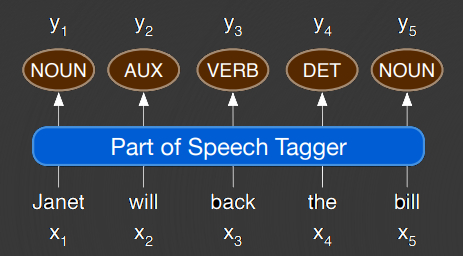

#### The Penn Treebank Tagset

The Penn treebank PoS tag set has 36 POS tags plus 12 others for punctuations
and special symbols. They're reported in the following table:

| Part-of-Speech | Tag | Part-of-Speech | Tag
| -- | -- | -- | -- |
| Coordinating Conjunction | CC | Verb Be, Base Form | VB |
| Cardinal Number | CD | Verb Be, Past Tense | VBD |
| Determiner | DT | Verb Be, Gerund | VBG |
| Existential "There" | EX | Verb Be, Past Participle | VBN |
| Foreign Word | FW | Verb Be, Non-3rd Person Singular, Present | VBP |
| Preposition/Subordinating Conjunction | IN | Verb Be, 3rd Person Singular, Present | VBZ |
| Subordinator "That" | IN/That | Verb Have, Base Form | VH |
| Adjective | JJ | Verb Have, Past Tense | VHD |
| Adjective, Comperative | JJR | Verb Have, Gerund | VHG |
| Adjective, Superlative | JJS | Verb Have, Past Participle | VHN |
| List Marker | LS | Verb Have, Non-3rd Person Singular, Present | VHP |
| Modal | MD | Verb Have, 3rd Person Singular, Present | VHZ |
| Noun, Singular or Mass | NN | Verb, Base Form | VV |
| Noun, Plural | NNS | Verb, Past Tense | VVD |
| Proper Noun, Singluar | NP | Verb, Gerund | VVG |
| Proper Noun, Plural | NPS | Verb, Non-3rd Person Singular, Present | VVP |
| Predeterminer | PDT | Verb, 3rd Person Singular, Present | VVZ |
| Possessive Ending | POS | WH-Determiner | WDT |
| Possessive Pronoun | PPZ | WH-Pronoun | WP |
| Adverb | RB | Possessive WH-Pronoun | WP\$ |
| Adverb, Comparative | RBR | WH-Adverb | WRB |
| Adverb, Superlative | RBS | # | # |
| Particle | RP | \$ | \$ |
| Sentence-break Punctuation | SENT | Quotation Marks | " |
| Symbol | SYM | Opening/Closing Brackets | (/) |
| Infinitive "To" | TO | Comma | , |
| Interjection | UH | Punctuation | : |


## Implementation of a PoS Tagger

### Imports

In [1]:
# Download and Extract the Dataset
import os
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

# Strings manipulation
import re

# Load and Explore the Dataframe
import numpy as np
import pandas as pd

# Model Creation, Training, and Evaluation
import keras
import tensorflow as tf
import gensim.downloader as gloader
from keras.optimizers import Adam
from keras.layers import Embedding, Bidirectional, LSTM, GRU, TimeDistributed, Dense
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Matplotlib
import matplotlib.pyplot as plt

# plt.rcdefaults()
plt.rcParams["figure.facecolor"] = "#383838"
plt.rcParams["axes.facecolor"] = "#383838"

FONT_COLOUR = "white"
plt.rcParams["text.color"] = FONT_COLOUR
plt.rcParams["axes.labelcolor"] = FONT_COLOUR
plt.rcParams["xtick.color"] = FONT_COLOUR
plt.rcParams["ytick.color"] = FONT_COLOUR
plt.rcParams["axes.edgecolor"] = FONT_COLOUR

In [3]:
# Seed session for reproducibility purposes
seed = 42

np.random.seed(seed)
tf.random.set_seed(seed)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

### Downloading the Dataset

First, the [dependency_treebank](https://www.nltk.org/nltk_data/) dataset is downloaded from `NLTK`'s data module as a *`.zip`* file. The file is then extracted into the `data/` directory. The structure of the dataset directory is shown below:

```
data/
├── dependency_treebank/
      ├── wsj_0001.dp
      ├── wsj_0002.dp
      ├── ...
      ├── wsj_0199.dp
```

As shown above, the dataset is composed of 199 documents. Each document consists of several sentences, each of which is divided into triplets that follow the format: `word` `\t` `token` `\t` `int` `\n`. 

The numeric values in the third column are ignored and the column is dropped accordingly when loading the dataset into a Pandas DataFrame. Additionally, the train-val-test splits are as follows:

*   `train`: `wsj_0001.dp` to `wsj_0100.dp` (100 documents/50%)
*   `test`:  `wsj_0151.dp` to `wsj_0199.dp` (49 documents/25%)
*   `val`:   `wsj_0101.dp` to `wsj_0150.dp` (50 documents/25%)

Since each document contains a variable number of sentences, this split isn't a clear indicator of the true data percentage of each split. This issue is ameliorated later in the notebook.

In [4]:
# Extract dataset in the current folder
def download_and_unzip(url, extract_to="."):
    http_response = urlopen(url)
    zipfile = ZipFile(BytesIO(http_response.read()))
    zipfile.extractall(path=extract_to)

In [5]:
url = "https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip"
download_and_unzip(url)

### Loading the Dataset into a Dataframe

To load the dataset into a dataframe we use a list of `dictionaries` where each dictionary is a sentence.

Before encoding the dataset as a Pandas DataFrame, the following preprocessing steps are taken:

*   As mentioned above, the third column is dropped.
*   All words are lowercased.
  - This step is crucial to find the correspondent tokens in the pre-trained embedding model's vocabulary. 
*   The documents are split into sentences so that each row in the output DataFrame corresponds to a sentence. To do so, a list of `dictionaries` is used where each dictionary is a sentence.

**Resulting DataFrame**

| document_num | sentence_num | split |tokens | tags |
| --- | --- | --- | --- | --- |
| --- | --- | --- | --- | --- |


*   `document_num` *(int)* is the document's identifier of the sentence.
*   `sentence_num` *(int)* is the sentence's identifer in the document.
*   `split` *(string)* whether the sentence belongs to `train`, `val`, or `test` set.
*   `tokens` *(list)* of the sentence's tokens.
*   `tags` *(list)* of the corresponding tags.

In [6]:
# Sort the list of files in the directory '/content/dependency_treebank'
listdir = sorted(os.listdir('/content/dependency_treebank'))

# Initialize an empty list to store dictionaries
dictionaries = []

# Loop through each file in the list
for filename in listdir:
  # Create an empty dictionary
  new_dict = {}
  
  # Extract the document number from the filename
  doc_num = int(filename.split("_")[1].split(".")[0])
  
  # Determine the split (training, validation, or test) based on the document number
  if doc_num <= 100:
    split = "training"
  elif 101 <= doc_num <= 150:
    split = "validation"
  else:
    split = "test"
  
  # Read the file using pandas and skip empty lines
  df = pd.read_csv(f"dependency_treebank/{filename}", sep="\t", names=["token", "tag", "3"], skip_blank_lines=False)
  
  # Drop the third column
  df = df.drop("3", axis=1)
  
  # Add a column that indicates the sentence number for each row
  df["sent_num"] = df.isnull().all(axis=1).cumsum()
  
  # Drop rows with null values
  df = df.dropna()
  
  # Lowercase all the tokens
  df["token"] = df["token"].str.lower()
  
  # Loop through each unique sentence number
  for i in df["sent_num"].unique():
    # Extract the list of tokens and tags for the current sentence
    list_tokens = list(df[df["sent_num"] == i]["token"])
    list_tags = list(df[df["sent_num"] == i]["tag"])
    
    # Create a dictionary for the current sentence
    dict_temp = {
      "doc num": doc_num,
      "sent num": i,
      "split": split,
      "tokens": list_tokens,
      "tags": list_tags
      }
    
    # Add the dictionary to the list of dictionaries
    dictionaries.append(dict_temp)

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(dictionaries)

<ipython-input-6-40f1d1daa801>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["token"] = df["token"].str.lower()


In [7]:
df

,doc num,sent num,split,tokens,tags
0,1,0,training,"[pierre, vinken, ,, 61, years, old, ,, will, j...","[NNP, NNP, ,, CD, NNS, JJ, ,, MD, VB, DT, NN, ..."
1,1,1,training,"[mr., vinken, is, chairman, of, elsevier, n.v....","[NNP, NNP, VBZ, NN, IN, NNP, NNP, ,, DT, NNP, ..."
2,2,0,training,"[rudolph, agnew, ,, 55, years, old, and, forme...","[NNP, NNP, ,, CD, NNS, JJ, CC, JJ, NN, IN, NNP..."
3,3,0,training,"[a, form, of, asbestos, once, used, to, make, ...","[DT, NN, IN, NN, RB, VBN, TO, VB, NNP, NN, NNS..."
4,3,1,training,"[the, asbestos, fiber, ,, crocidolite, ,, is, ...","[DT, NN, NN, ,, NN, ,, VBZ, RB, JJ, IN, PRP, V..."
...,...,...,...,...,...
3909,198,9,test,"[they, also, said, that, more, than, a, dozen,...","[PRP, RB, VBD, IN, JJR, IN, DT, NN, NNS, VBP, ..."
3910,198,10,test,"[sen., kennedy, said, in, a, separate, stateme...","[NNP, NNP, VBD, IN, DT, JJ, NN, IN, PRP, VBZ, ..."
3911,199,0,test,"[trinity, industries, inc., said, it, reached,...","[NNP, NNPS, NNP, VBD, PRP, VBD, DT, JJ, NN, TO..."
3912,199,1,test,"[terms, were, n't, disclosed, .]","[NNS, VBD, RB, VBN, .]"


### Dataframe Exploration

Examining the length of all the sentences in the dataset is important to decide the maximum sequence length `max_len` hyperparameter used when padding data batches for the model.

The lengths of the sentences are calculated using the `len` function applied to the `tokens` column of the `df` DataFrame and then stored in the `sentences_len` variable.

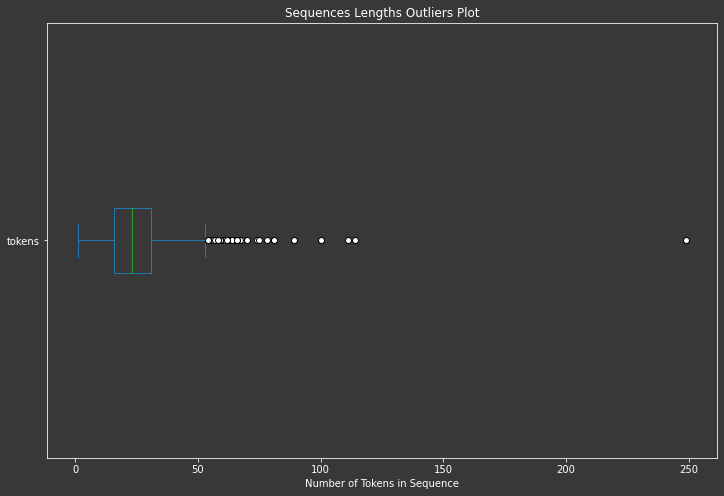

In [8]:
sentences_len = df["tokens"].apply(len)

# Create a box plot of the sentence lengths
sentences_len.plot.box(figsize=(12, 8), vert=False, flierprops={"marker": "o", "markerfacecolor": "white"})

plt.xlabel("Number of Tokens in Sequence")
plt.title("Sequences Lengths Outliers Plot")
plt.show()

In [9]:
print(f"Total number of sentences in the dataset: {len(df)}")
print(f"Number of sentences with length > 50: {(sentences_len > 50).sum()}")
print(f"Number of sentences with length > 64: {(sentences_len > 64).sum()}")
print(f"Number of sentences with length > 128: {(sentences_len > 128).sum()}")

Total number of sentences in the dataset: 3914
Number of sentences with length > 50: 70
Number of sentences with length > 64: 16
Number of sentences with length > 128: 1


The concentration of words in sentences is between 0 and 50, while the outliers are from 50 to 250. A possible `max_len` hyperparameter can be 64.

In [10]:
max_len = 64

To print out all the tags, the `tags` column, which contains lists of tags, is splitted into individual rows by the `explode()` function.


In [11]:
print(pd.unique(df['tags'].explode()))

['NNP' ',' 'CD' 'NNS' 'JJ' 'MD' 'VB' 'DT' 'NN' 'IN' '.' 'VBZ' 'VBG' 'CC'
 'VBD' 'VBN' 'RB' 'TO' 'PRP' 'RBR' 'WDT' 'VBP' 'RP' 'PRP$' 'JJS' 'POS'
 '``' 'EX' "''" 'WP' ':' 'JJR' 'WRB' '$' 'NNPS' 'WP$' '-LRB-' '-RRB-'
 'PDT' 'RBS' 'FW' 'UH' 'SYM' 'LS' '#']


### Text Vectorization

This section instantiates two of Keras's [TextVectorization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization) preprocessing layers to map the tokens and tags into integer indices sequences. It learns two sets of vocabularies (one for the tokens and another for the tags) through the `.adapt()` method. The layers are adapted solely to the training set.

When the layers are adapted, they will analyze the dataset, determine the frequency of individual string values, and create vocabularies from them. The tags vocabulary isn't learned from the dataset but provided manually. Each vocabulary contains two extra entries for the padding token `""` and the OOV one `[UNK]`. 

After vectorization, the tags vectors are one-hot encoded to be used in training with the categorical cross-entropy loss. Thus, the layer outputs vectors of fixed length by padding or truncating them to `max_len`. This results in an output of shape (`batch_size`, `max_len`) for the tokens and (`batch_size`, `max_len`, `tags_vocabulary_size`) for the one-hot encoded tags.

#### Initialization

In [12]:
# Initialize two TextVectorization layers
tokens_vectorize_layer = keras.layers.TextVectorization(
    # Outputs integer indices
    output_mode="int",  

    # Outputs sequences of length `max_len`
    output_sequence_length=max_len,  

    # Do not standardize input
    standardize=None,  

    # Do not split input on whitespace
    split=None)  

tags_vectorize_layer = keras.layers.TextVectorization(
    # Outputs integer indices
    output_mode="int",  

    # Outputs sequences of length `max_len`
    output_sequence_length=max_len,  

    # Do not standardize input
    standardize=None,  

    # Do not split input on whitespace
    split=None)  

# Get training data for the tokens
training_tokens = df[df["split"] == "training"]["tokens"].explode()

# Adapt the tokens_vectorize_layer to the training data
tokens_vectorize_layer.adapt(training_tokens)

# Get training data for the tags
training_tags = df[df["split"] == "training"]["tags"].explode()

# Adapt the tags_vectorize_layer to the training data
tags_vectorize_layer.adapt(training_tags)

# Get the vocabulary for the tokens
tokens_vocabulary = tokens_vectorize_layer.get_vocabulary()

# Get the size of the vocabulary for the tokens
tokens_vocabulary_size = tokens_vectorize_layer.vocabulary_size()

# Get the vocabulary for the tags
tags_vocabulary = tags_vectorize_layer.get_vocabulary()

# Get the size of the vocabulary for the tags
tags_vocabulary_size = tags_vectorize_layer.vocabulary_size()

#### Examples

Let's print out some examples.

In [13]:
# Print the first 10 tokens in the vocabulary
print("Tokens vocabulary:")
print(tokens_vocabulary[0:12])  
print()
# Print the size of the tokens vocabulary
print("Size of tokens vocabulary:")
print(tokens_vocabulary_size)   
print()

# Print the first 10 tags in the vocabulary
print("Tags vocabulary:")
print(tags_vocabulary[0:12])
print()
# Print the size of the tags vocabulary
print("Size of tags vocabulary:")
print(tags_vocabulary_size)

Tokens vocabulary:
['', '[UNK]', ',', 'the', '.', 'of', 'to', 'a', 'in', 'and', 'for', "'s"]

Size of tokens vocabulary:
7406

Tags vocabulary:
['', '[UNK]', 'NN', 'NNP', 'IN', 'DT', 'NNS', 'JJ', ',', '.', 'VBD', 'RB']

Size of tags vocabulary:
47


In [14]:
# Example of the first sentence
tokens_example = df["tokens"][0]
print(tokens_example)
tokens_vectorize_layer(tokens_example)

['pierre', 'vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'nov.', '29', '.']


<tf.Tensor: shape=(64,), dtype=int64, numpy=
array([4712, 2350,    2, 2289,   65,  356,    2,   41, 1585,    3,  200,
         24,    7, 1209,  277,  755, 3396,    4,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0])>

In [15]:
# Example of the first sentence
tags_example = df["tags"][0]
print(tags_example)
tags_vectorize_layer(tags_example)

['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', ',', 'MD', 'VB', 'DT', 'NN', 'IN', 'DT', 'JJ', 'NN', 'NNP', 'CD', '.']


<tf.Tensor: shape=(64,), dtype=int64, numpy=
array([ 3,  3,  8, 12,  6,  7,  8, 21, 13,  5,  2,  4,  5,  7,  2,  3, 12,
        9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])>

#### Training Set

The training set is built by vectorizing the `tokens` and `tags` columns for rows where the `split` column is equal to `training` using boolean indexing. Finally, a one-hot encoding is performed on the vectorized tags.

In [16]:
# train set tokens + tags
train_tokens = df[df["split"]=="training"]["tokens"]
vectorize_train_tokens = tokens_vectorize_layer(tf.ragged.constant(train_tokens))
print(vectorize_train_tokens.shape)

train_tags = df[df["split"]=="training"]["tags"]
vectorize_train_tags = tags_vectorize_layer(tf.ragged.constant(train_tags))
print(vectorize_train_tags.shape)

onehot_train_tags = tf.keras.utils.to_categorical(vectorize_train_tags)
print(onehot_train_tags.shape)

(1963, 64)
(1963, 64)
(1963, 64, 47)


The operations above are performed also to compute the **validation set**, the **training and validation set** and the **test set**.

#### Validation Set

In [17]:
# val set tokens + tags
val_tokens = df[df["split"]=="validation"]["tokens"]
vectorize_val_tokens = tokens_vectorize_layer(tf.ragged.constant(val_tokens))
print(vectorize_val_tokens.shape)

val_tags = df[df["split"]=="validation"]["tags"]
vectorize_val_tags = tags_vectorize_layer(tf.ragged.constant(val_tags))
print(vectorize_val_tags.shape)

onehot_val_tags = tf.keras.utils.to_categorical(vectorize_val_tags)
print(onehot_val_tags.shape)

(1299, 64)
(1299, 64)
(1299, 64, 47)


#### Test Set

In [18]:
# test set tokens + tags
test_tokens = df[df["split"]=="test"]["tokens"]
vectorize_test_tokens = tokens_vectorize_layer(tf.ragged.constant(test_tokens))
print(vectorize_test_tokens.shape)

test_tags = df[df["split"]=="test"]["tags"]
vectorize_test_tags = tags_vectorize_layer(tf.ragged.constant(test_tags))
print(vectorize_test_tags.shape)

onehot_test_tags = tf.keras.utils.to_categorical(vectorize_test_tags)
print(onehot_test_tags.shape)

(652, 64)
(652, 64)
(652, 64, 43)


In order to train the network, the input tensors for the training and test sets must have the same shape. The following code adds a padding to the third dimension of the test tags to make it equal to 47.

In [19]:
print("Shape pre-padding", onehot_test_tags.shape)

paddings = tf.constant([[0, 0], [0, 0], [0, 4]])
onehot_test_tags = tf.pad(onehot_test_tags, paddings, "CONSTANT")

print("Shape post-padding", onehot_test_tags.shape)

Shape pre-padding (652, 64, 43)
Shape post-padding (652, 64, 47)


### Embedding

This sections downloads a pre-trained GloVe word embeddings model, and uses it to create an embedding matrix. The embedding matrix is then used by the RNN model to map the integer sequences received from the vectorization layer into word embeddings of dimensionality equal to `embedding_dimension`.

In [20]:
embedding_dimension = 100

An embedding matrix is essentially a lookup table of the words in the learned vocabulary and their corresponding GloVe embedding. Thus, it is a matrix of dimensions `tokens_vocabulary_size` $\times$ `embedding_dimension`.

In [21]:
download_path = "glove-wiki-gigaword-{}".format(embedding_dimension)
emb_model = gloader.load(download_path)

[==================================================] 100.0% 128.1/128.1MB downloaded


In [22]:
# Initialize the embedding matrix
embedding_matrix = np.zeros((tokens_vocabulary_size, embedding_dimension))

misses = 0
for word in tokens_vocabulary:
    try:
        embedding_vector = emb_model[word]
        embedding_matrix[tokens_vocabulary.index(word)] = embedding_vector
    except (KeyError, TypeError):
        misses += 1

print(f"Total Number of Words = {tokens_vocabulary_size}")
print(f"Number of OOV words = {misses}. ({round(misses / tokens_vocabulary_size * 100, 2)}%)")

Total Number of Words = 7406
Number of OOV words = 361. (4.87%)


Words in the dataset that are not found in the GloVe embeddings model are given a null vector. This includes the padding token `""` as well as the OOV one `[UNK]`.

In [23]:
embedding_matrix.shape

(7406, 100)

### Models Training and Selection

In this section, the following four models are implemented:
- Bi LSTM layer + Dense/Fully-Connected layer
- Bi GRU + Dense/Fully-Connected layer
- 2 Bi LSTM layers + Dense/Fully-Connected layer
- Bi LSTM + 2 Dense/Fully-Connected layers

Each model will be trained on the training set and will be evaluated by computing the F1 score on the validation set.

#### Evaluation Metrics

The following code concerns developing a function which returns the macro average F1 score given the model's prediction and the corresponding ground truth. Punctuation tags are ignored during the computation of this metric.

*N.B. All classes that represent symbols have been considered as punctutation.*

In [24]:
# creation of the vectorized punctuation array
punctuation = [",", ".", "``", "''", "$", ":", "-RRB-", "-LRB-", "LS", "SYM", "#"]
punct_vector = tags_vectorize_layer(punctuation)
punct_vector = punct_vector.numpy().tolist()

punct_vector = [x for x in punct_vector if x != 0]
print(punct_vector)

[8, 9, 22, 25, 26, 27, 36, 37, 40, 45, 46]


In [25]:
# takes a tensor as input and flattens it
def flatten_array(y):
  """
  This function flattens all tokens and argmaxes the one-hot encoding to obtain
  a unidimensional vector of labels.
  """
  y_categorical = np.argmax(y, axis=2)
  y_flatten = y_categorical.flatten()
  return y_flatten

In [26]:
# removal of the punctuation
def remove_punct(y_true, y_pred):
    """
    This function removes the punctuation from the ground truth and from the model's prediction.
    """
    y_true_flatten_no_punct = []
    y_pred_flatten_no_punct = []

    for i in range(len(y_true)):
        if y_true[i] not in punct_vector:
            y_true_flatten_no_punct.append(y_true[i])
            y_pred_flatten_no_punct.append(y_pred[i])
    
    return y_true_flatten_no_punct, y_pred_flatten_no_punct

In [27]:
# calculate and return the F1 score
def f1_score_no_punct(y_true, y_pred):
    """
    Compute the macro F1 score, ignoring the punctuation classes.
    """
    y_true_flattened = flatten_array(y_true)  # ground truth is flattened
    y_pred_flattened = flatten_array(y_pred)  # model's prediction is flattened

    y_true_flatten_no_punct, y_pred_flatten_no_punct = remove_punct(y_true_flattened, y_pred_flattened)

    return round(f1_score(y_true_flatten_no_punct, y_pred_flatten_no_punct, average="macro", zero_division=0), 2)

In [28]:
labels_no_punct = [x for x in range(0, 47) if x not in punct_vector]
target_no_punct = [x for x in tags_vocabulary if x not in punctuation]

In [29]:
def plot_cm(y_true, y_pred):
  """
  Plot the Confusion Matrix.
  """

  # Flatten the batch tokens
  y_true = flatten_array(y_true)
  y_pred = flatten_array(y_pred)
  
  # Compute and plot the confusion matrix
  cm = confusion_matrix(y_true, y_pred, labels=labels_no_punct, normalize="true")
  cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_no_punct)
  fig, ax = plt.subplots(figsize=(24, 16))
  cm_disp.plot(ax=ax, cmap=plt.cm.Blues)

#### Bi LSTM layer + Dense/Fully-Connected layer

In [30]:
model_bilstm = keras.Sequential()

model_bilstm.add(Embedding(input_dim=tokens_vocabulary_size,
                           output_dim=embedding_dimension,
                           input_length=max_len,
                           weights=[embedding_matrix],
                           trainable=False))

model_bilstm.add(Bidirectional(LSTM(128, return_sequences=True)))

model_bilstm.add(TimeDistributed(Dense(tags_vocabulary_size, activation="softmax")))

model_bilstm.compile(loss="categorical_crossentropy",
                     optimizer=Adam(0.003),
                     metrics=["accuracy"])

model_bilstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 64, 100)           740600    
                                                                 
 bidirectional (Bidirectiona  (None, 64, 256)          234496    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 64, 47)           12079     
 ibuted)                                                         
                                                                 
Total params: 987,175
Trainable params: 246,575
Non-trainable params: 740,600
_________________________________________________________________


In [31]:
model_bilstm.fit(vectorize_train_tokens, 
                 onehot_train_tags,
                 epochs=10,
                 validation_data=(vectorize_val_tokens, onehot_val_tags))

Epoch 1/10
62/62 [==============================] - 9s 32ms/step - loss: 0.8577 - accuracy: 0.8110 - val_loss: 0.3995 - val_accuracy: 0.8883
Epoch 2/10
62/62 [==============================] - 1s 15ms/step - loss: 0.2556 - accuracy: 0.9336 - val_loss: 0.2584 - val_accuracy: 0.9279
Epoch 3/10
62/62 [==============================] - 1s 16ms/step - loss: 0.1752 - accuracy: 0.9525 - val_loss: 0.2179 - val_accuracy: 0.9371
Epoch 4/10
62/62 [==============================] - 1s 15ms/step - loss: 0.1417 - accuracy: 0.9607 - val_loss: 0.2019 - val_accuracy: 0.9421
Epoch 5/10
62/62 [==============================] - 1s 16ms/step - loss: 0.1208 - accuracy: 0.9664 - val_loss: 0.1860 - val_accuracy: 0.9469
Epoch 6/10
62/62 [==============================] - 1s 15ms/step - loss: 0.1059 - accuracy: 0.9706 - val_loss: 0.1745 - val_accuracy: 0.9498
Epoch 7/10
62/62 [==============================] - 1s 15ms/step - loss: 0.0932 - accuracy: 0.9745 - val_loss: 0.1715 - val_accuracy: 0.9509
Epoch 8/10
62

In [32]:
y_true_val = onehot_val_tags
y_pred_bilstm = model_bilstm.predict(vectorize_val_tokens)
print("Punctuation-less F1 Score of BiLSTM: ", f1_score_no_punct(y_true_val, y_pred_bilstm))

41/41 [==============================] - 1s 5ms/step
Punctuation-less F1 Score of BiLSTM:  0.66


#### Bi GRU + Dense/Fully-Connected layer

In [33]:
model_bigru = keras.Sequential()

model_bigru.add(Embedding(input_dim=tokens_vocabulary_size,
                          output_dim=embedding_dimension,
                          input_length=max_len,
                          weights=[embedding_matrix],
                          trainable=False))

model_bigru.add(Bidirectional(GRU(128, return_sequences=True)))

model_bigru.add(TimeDistributed(Dense(tags_vocabulary_size, activation="softmax")))

model_bigru.compile(loss="categorical_crossentropy",
                    optimizer=Adam(0.003),
                    metrics=["accuracy"])

model_bigru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 64, 100)           740600    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64, 256)          176640    
 nal)                                                            
                                                                 
 time_distributed_1 (TimeDis  (None, 64, 47)           12079     
 tributed)                                                       
                                                                 
Total params: 929,319
Trainable params: 188,719
Non-trainable params: 740,600
_________________________________________________________________


In [34]:
model_bigru.fit(vectorize_train_tokens,
                onehot_train_tags,
                epochs=10,
                validation_data=(vectorize_val_tokens, onehot_val_tags))

Epoch 1/10
62/62 [==============================] - 4s 25ms/step - loss: 0.8089 - accuracy: 0.8444 - val_loss: 0.3159 - val_accuracy: 0.9077
Epoch 2/10
62/62 [==============================] - 1s 13ms/step - loss: 0.1938 - accuracy: 0.9470 - val_loss: 0.2241 - val_accuracy: 0.9347
Epoch 3/10
62/62 [==============================] - 1s 22ms/step - loss: 0.1372 - accuracy: 0.9615 - val_loss: 0.1928 - val_accuracy: 0.9438
Epoch 4/10
62/62 [==============================] - 1s 23ms/step - loss: 0.1103 - accuracy: 0.9687 - val_loss: 0.1788 - val_accuracy: 0.9475
Epoch 5/10
62/62 [==============================] - 1s 21ms/step - loss: 0.0909 - accuracy: 0.9739 - val_loss: 0.1652 - val_accuracy: 0.9522
Epoch 6/10
62/62 [==============================] - 1s 13ms/step - loss: 0.0765 - accuracy: 0.9784 - val_loss: 0.1584 - val_accuracy: 0.9531
Epoch 7/10
62/62 [==============================] - 1s 13ms/step - loss: 0.0643 - accuracy: 0.9822 - val_loss: 0.1586 - val_accuracy: 0.9534
Epoch 8/10
62

In [35]:
y_pred_bigru = model_bigru.predict(vectorize_val_tokens)
print("Punctuation-less F1 Score of BiGRU: ", f1_score_no_punct(y_true_val, y_pred_bigru))

41/41 [==============================] - 1s 6ms/step
Punctuation-less F1 Score of BiGRU:  0.7


#### Bi LSTM layers + Dense/Fully-Connected layer

In [36]:
model_bilstm_stacked = keras.Sequential()

model_bilstm_stacked.add(Embedding(input_dim=tokens_vocabulary_size,
                                   output_dim=embedding_dimension,
                                   input_length=max_len,
                                   weights=[embedding_matrix],
                                   trainable=False))

model_bilstm_stacked.add(Bidirectional(LSTM(64, return_sequences=True)))

model_bilstm_stacked.add(Bidirectional(LSTM(128, return_sequences=True)))

model_bilstm_stacked.add(TimeDistributed(Dense(tags_vocabulary_size, activation="softmax")))

model_bilstm_stacked.compile(loss="categorical_crossentropy",
                             optimizer=Adam(0.003),
                             metrics=["accuracy"])

model_bilstm_stacked.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 64, 100)           740600    
                                                                 
 bidirectional_2 (Bidirectio  (None, 64, 128)          84480     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64, 256)          263168    
 nal)                                                            
                                                                 
 time_distributed_2 (TimeDis  (None, 64, 47)           12079     
 tributed)                                                       
                                                                 
Total params: 1,100,327
Trainable params: 359,727
Non-trainable params: 740,600
________________________________________

In [37]:
model_bilstm_stacked.fit(vectorize_train_tokens,
                         onehot_train_tags,
                         epochs=10,
                         validation_data=(vectorize_val_tokens, onehot_val_tags))

Epoch 1/10
62/62 [==============================] - 8s 47ms/step - loss: 1.0823 - accuracy: 0.7282 - val_loss: 0.6134 - val_accuracy: 0.8283
Epoch 2/10
62/62 [==============================] - 1s 24ms/step - loss: 0.3778 - accuracy: 0.8970 - val_loss: 0.3069 - val_accuracy: 0.9156
Epoch 3/10
62/62 [==============================] - 1s 24ms/step - loss: 0.2068 - accuracy: 0.9441 - val_loss: 0.2421 - val_accuracy: 0.9312
Epoch 4/10
62/62 [==============================] - 1s 24ms/step - loss: 0.1535 - accuracy: 0.9579 - val_loss: 0.2065 - val_accuracy: 0.9417
Epoch 5/10
62/62 [==============================] - 1s 24ms/step - loss: 0.1258 - accuracy: 0.9651 - val_loss: 0.1863 - val_accuracy: 0.9455
Epoch 6/10
62/62 [==============================] - 1s 24ms/step - loss: 0.1033 - accuracy: 0.9709 - val_loss: 0.1727 - val_accuracy: 0.9499
Epoch 7/10
62/62 [==============================] - 1s 24ms/step - loss: 0.0885 - accuracy: 0.9751 - val_loss: 0.1705 - val_accuracy: 0.9502
Epoch 8/10
62

In [38]:
y_pred_bilstm_stacked = model_bilstm_stacked.predict(vectorize_val_tokens)
print("Punctuation-less F1 Score of Stacked BiLSTM: ", f1_score_no_punct(y_true_val, y_pred_bilstm_stacked))

41/41 [==============================] - 2s 8ms/step
Punctuation-less F1 Score of Stacked BiLSTM:  0.69


#### Bi LSTM + 2 Dense/Fully-Connected layers

In [39]:
model_bilstm_stacked_dense = keras.Sequential()

model_bilstm_stacked_dense.add(Embedding(input_dim=tokens_vocabulary_size,
                                         output_dim=embedding_dimension,
                                         input_length=max_len,
                                         weights=[embedding_matrix],
                                         trainable=False))

model_bilstm_stacked_dense.add(Bidirectional(LSTM(128, return_sequences=True)))

model_bilstm_stacked_dense.add(TimeDistributed(Dense(256, activation="relu")))

model_bilstm_stacked_dense.add(TimeDistributed(Dense(tags_vocabulary_size, activation="softmax")))

model_bilstm_stacked_dense.compile(loss="categorical_crossentropy",
                                   optimizer=Adam(0.003),
                                   metrics=["accuracy"])

model_bilstm_stacked_dense.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 64, 100)           740600    
                                                                 
 bidirectional_4 (Bidirectio  (None, 64, 256)          234496    
 nal)                                                            
                                                                 
 time_distributed_3 (TimeDis  (None, 64, 256)          65792     
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 64, 47)           12079     
 tributed)                                                       
                                                                 
Total params: 1,052,967
Trainable params: 312,367
Non-trainable params: 740,600
________________________________________

In [40]:
model_bilstm_stacked_dense.fit(vectorize_train_tokens,
                               onehot_train_tags,
                               epochs=10,
                               validation_data=(vectorize_val_tokens, onehot_val_tags))

Epoch 1/10
62/62 [==============================] - 5s 28ms/step - loss: 0.8021 - accuracy: 0.8186 - val_loss: 0.3300 - val_accuracy: 0.9035
Epoch 2/10
62/62 [==============================] - 1s 16ms/step - loss: 0.1981 - accuracy: 0.9445 - val_loss: 0.2204 - val_accuracy: 0.9374
Epoch 3/10
62/62 [==============================] - 1s 16ms/step - loss: 0.1373 - accuracy: 0.9608 - val_loss: 0.1916 - val_accuracy: 0.9437
Epoch 4/10
62/62 [==============================] - 1s 17ms/step - loss: 0.1127 - accuracy: 0.9669 - val_loss: 0.1756 - val_accuracy: 0.9488
Epoch 5/10
62/62 [==============================] - 1s 16ms/step - loss: 0.0910 - accuracy: 0.9733 - val_loss: 0.1701 - val_accuracy: 0.9507
Epoch 6/10
62/62 [==============================] - 1s 16ms/step - loss: 0.0738 - accuracy: 0.9783 - val_loss: 0.1627 - val_accuracy: 0.9530
Epoch 7/10
62/62 [==============================] - 1s 16ms/step - loss: 0.0610 - accuracy: 0.9825 - val_loss: 0.1579 - val_accuracy: 0.9541
Epoch 8/10
62

In [41]:
y_pred_bilstm_stacked_dense = model_bilstm_stacked_dense.predict(vectorize_val_tokens)
print("Punctuation-less F1 Score of BiLSTM w/ Stacked FC: ", f1_score_no_punct(y_true_val, y_pred_bilstm_stacked_dense))

41/41 [==============================] - 1s 5ms/step
Punctuation-less F1 Score of BiLSTM w/ Stacked FC:  0.7


#### Models Selection

All four models have similar accuracy but based on the F1 score the best performing models are:

- BiGRU
- BiLSTM - Stacked Dense Layers

Despite both models having high validation accuracy, their F1 scores are considerably worse. It is most likely because the model is misclassifying some underrepresented PoS tags. This issue is investigated further by visualising the confusion matrix for both models' predictions on the validation set.

#### Validation Error Analysis

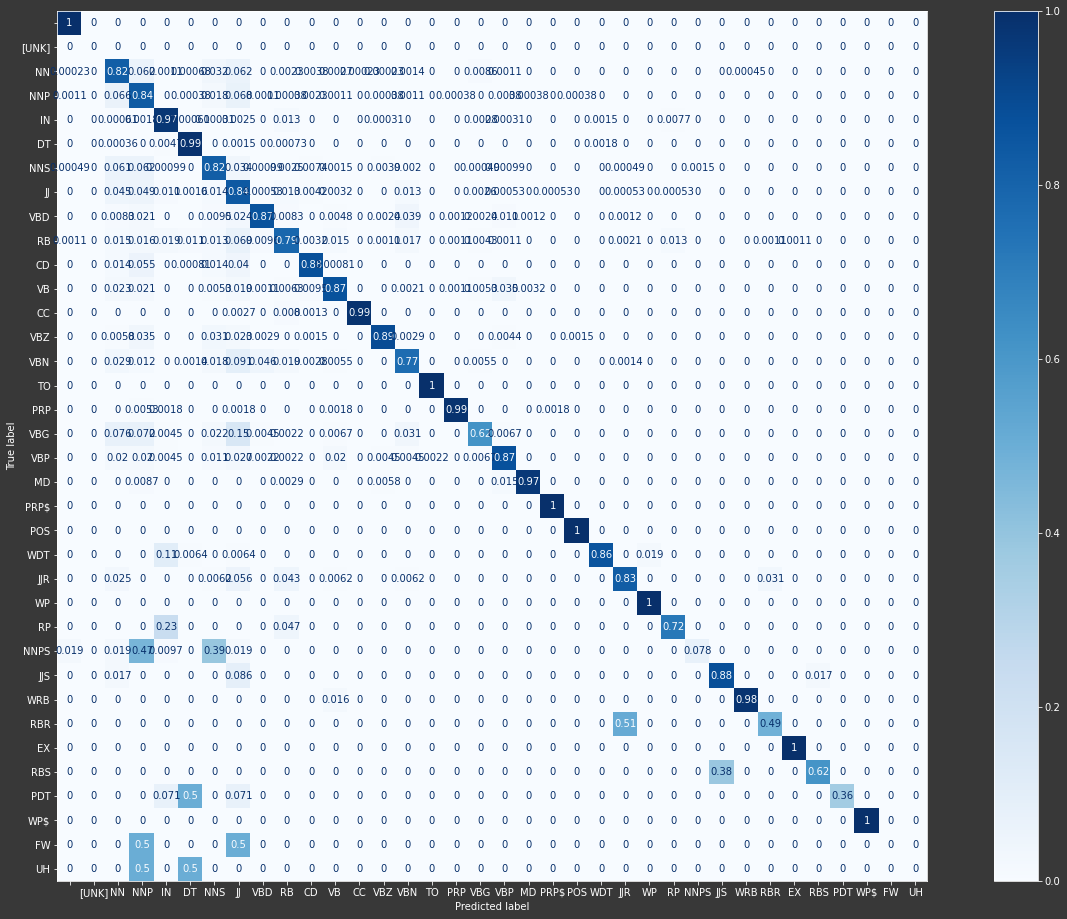

In [42]:
plot_cm(y_true_val, y_pred_bigru)

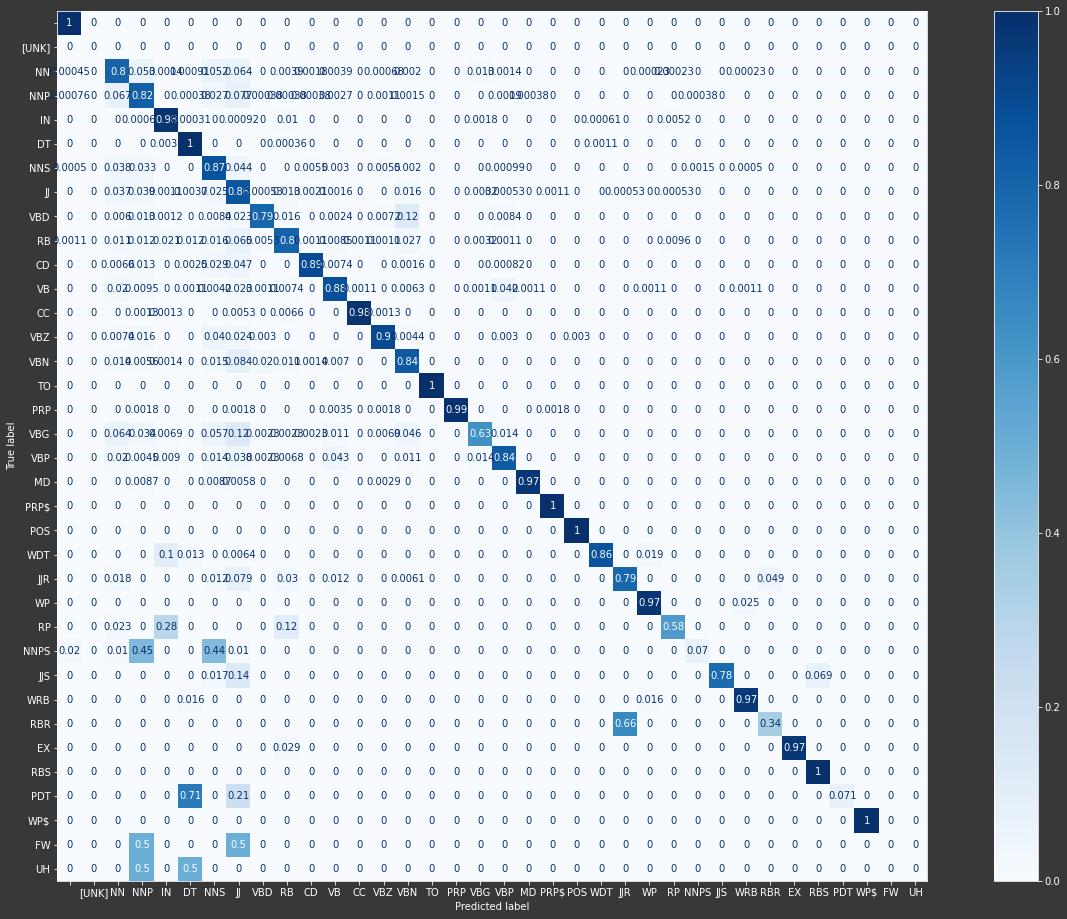

In [43]:
plot_cm(y_true_val, y_pred_bilstm_stacked_dense)

The most apparent problem both models have is their inability to correctly classify tokens with the following PoS tags:
- `FW` (Foreign Word)
- `UH` (Interjection)
- `PDT` (Predeterminer)
- `NNPS` (Proper Plural Noun) 
- `PDT` (Predeterminer)

To understand why these tags are being misclassified, their frequency in the datasets is checked.

As shown below, the training set is heavily imbalanced. In fact, it contains a single `UH` (Interjection) token and a couple of `FW` (Foreign Word) tokens. They're also very few `PDT` (Predeterminer) tokens. This explains the models' poor performance on these tags.

As for the `NNPS` (Proper Plural Noun), both models are indecisive in their classification among `NNP` (Plural Noun), `NNS` (Singular Noun), and `NNPS` (Proper Plural Noun), which are not unreasonable mistakes, considering it is one of the underrepresented tags in the dataset. Moreover, the models cannot distinguish between:

- Comparative/superlative adverbs `RBR`/`RBS` and their respective adjectives `JJR`/`JJS`.

- Predeterminers `PDT` and determiners `DT`.



In [44]:
training_tags.value_counts()

NN       6270
NNP      5202
IN       4952
DT       4076
NNS      3004
JJ       2992
,        2571
.        1959
VBD      1548
RB       1490
CD       1439
VB       1195
CC       1141
VBZ      1133
VBN      1031
TO       1028
PRP       954
VBG       763
VBP       727
MD        413
PRP$      409
``        409
POS       403
''        399
$         342
:         293
WDT       204
JJR       157
WP        141
RP        140
NNPS       95
JJS        93
WRB        92
RBR        86
-RRB-      55
-LRB-      52
EX         49
RBS        19
LS         10
PDT         9
WP$         6
FW          2
UH          1
SYM         1
#           1
Name: tags, dtype: int64

### Models Evaluation

In this section, the evaluation on the test set of both models is performed. Due to the fact that their GloVe weights are frozen, the models have to be trained again with the **training and validation set**. 

#### Merging the Training and Validation Sets

In [45]:
# train + validation set
train_val_tokens = df[df["split"]!="test"]["tokens"]
vectorize_train_val_tokens = tokens_vectorize_layer(tf.ragged.constant(train_val_tokens))
print(vectorize_train_val_tokens.shape)

train_val_tags = df[df["split"]!="test"]["tags"]
vectorize_train_val_tags = tags_vectorize_layer(tf.ragged.constant(train_val_tags))
print(vectorize_train_val_tags.shape)

onehot_train_val_tags = tf.keras.utils.to_categorical(vectorize_train_val_tags)
print(onehot_train_val_tags.shape)

(3262, 64)
(3262, 64)
(3262, 64, 47)


In [46]:
# Re-adapting the vectorization layers 
tokens_vectorize_layer = keras.layers.TextVectorization(output_mode="int",
                                                        output_sequence_length=max_len,
                                                        standardize=None,
                                                        split=None)

tokens_vectorize_layer.adapt(train_val_tokens.explode())
tokens_vocabulary = tokens_vectorize_layer.get_vocabulary()
tokens_vocabulary_size = tokens_vectorize_layer.vocabulary_size()

In [47]:
# Re-creating the embedding matrix
embedding_matrix = np.zeros((tokens_vocabulary_size, embedding_dimension)) 

misses = 0
for word in tokens_vocabulary:
    try:
        embedding_vector = emb_model[word]
        embedding_matrix[tokens_vocabulary.index(word)] = embedding_vector
    except (KeyError, TypeError):
        misses += 1

print(f"Total Number of Words = {tokens_vocabulary_size}")
print(f"Number of OOV words = {misses}. ({round(misses / tokens_vocabulary_size * 100, 2)}%)")

Total Number of Words = 9903
Number of OOV words = 550. (5.55%)


#### First Model (BiGRU)

In [48]:
model_bigru = keras.Sequential()

model_bigru.add(Embedding(input_dim=tokens_vocabulary_size,
                          output_dim=embedding_dimension,
                          input_length=max_len,
                          weights=[embedding_matrix],
                          trainable=False))

model_bigru.add(Bidirectional(GRU(128, return_sequences=True)))

model_bigru.add(TimeDistributed(Dense(tags_vocabulary_size, activation="softmax")))

model_bigru.compile(loss="categorical_crossentropy",
                    optimizer=Adam(0.003),
                    metrics=["accuracy"])

model_bigru.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 64, 100)           990300    
                                                                 
 bidirectional_5 (Bidirectio  (None, 64, 256)          176640    
 nal)                                                            
                                                                 
 time_distributed_5 (TimeDis  (None, 64, 47)           12079     
 tributed)                                                       
                                                                 
Total params: 1,179,019
Trainable params: 188,719
Non-trainable params: 990,300
_________________________________________________________________


In [49]:
# training
model_bigru.fit(vectorize_train_val_tokens,
                onehot_train_val_tags,
                epochs=10,
                validation_data=(vectorize_test_tokens, onehot_test_tags))

Epoch 1/10
102/102 [==============================] - 5s 18ms/step - loss: 0.8094 - accuracy: 0.8133 - val_loss: 0.4174 - val_accuracy: 0.8749
Epoch 2/10
102/102 [==============================] - 1s 11ms/step - loss: 0.3666 - accuracy: 0.8897 - val_loss: 0.3150 - val_accuracy: 0.9043
Epoch 3/10
102/102 [==============================] - 1s 11ms/step - loss: 0.2862 - accuracy: 0.9132 - val_loss: 0.2606 - val_accuracy: 0.9196
Epoch 4/10
102/102 [==============================] - 1s 11ms/step - loss: 0.2368 - accuracy: 0.9282 - val_loss: 0.2289 - val_accuracy: 0.9284
Epoch 5/10
102/102 [==============================] - 1s 11ms/step - loss: 0.2016 - accuracy: 0.9385 - val_loss: 0.2145 - val_accuracy: 0.9332
Epoch 6/10
102/102 [==============================] - 1s 11ms/step - loss: 0.1714 - accuracy: 0.9479 - val_loss: 0.2019 - val_accuracy: 0.9377
Epoch 7/10
102/102 [==============================] - 1s 11ms/step - loss: 0.1489 - accuracy: 0.9551 - val_loss: 0.1890 - val_accuracy: 0.9399

In [50]:
y_true = onehot_test_tags
y_pred_bigru = model_bigru.predict(vectorize_test_tokens)
print(f"F1 Score: {f1_score_no_punct(y_true, y_pred_bigru)}")

21/21 [==============================] - 1s 4ms/step
F1 Score: 0.72


#### Second Model (BiLSTM Stacked Dense Layers)

In [51]:
model_bilstm_stacked = keras.Sequential()

model_bilstm_stacked.add(Embedding(input_dim=tokens_vocabulary_size,
                                   output_dim=embedding_dimension,
                                   input_length=max_len,
                                   weights=[embedding_matrix],
                                   trainable=False))

model_bilstm_stacked.add(Bidirectional(LSTM(128, return_sequences=True)))

model_bilstm_stacked.add(TimeDistributed(Dense(256, activation="relu")))

model_bilstm_stacked.add(TimeDistributed(Dense(tags_vocabulary_size, activation="softmax")))

model_bilstm_stacked.compile(loss="categorical_crossentropy",
                             optimizer=Adam(0.003),
                             metrics=["accuracy"])

model_bilstm_stacked.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 64, 100)           990300    
                                                                 
 bidirectional_6 (Bidirectio  (None, 64, 256)          234496    
 nal)                                                            
                                                                 
 time_distributed_6 (TimeDis  (None, 64, 256)          65792     
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 64, 47)           12079     
 tributed)                                                       
                                                                 
Total params: 1,302,667
Trainable params: 312,367
Non-trainable params: 990,300
________________________________________

In [52]:
model_bilstm_stacked.fit(vectorize_train_val_tokens,
                         onehot_train_val_tags,
                         epochs=10,
                         validation_data=(vectorize_test_tokens, onehot_test_tags))

Epoch 1/10
102/102 [==============================] - 5s 21ms/step - loss: 0.7906 - accuracy: 0.7968 - val_loss: 0.4434 - val_accuracy: 0.8659
Epoch 2/10
102/102 [==============================] - 1s 13ms/step - loss: 0.3838 - accuracy: 0.8832 - val_loss: 0.3197 - val_accuracy: 0.9005
Epoch 3/10
102/102 [==============================] - 1s 13ms/step - loss: 0.2933 - accuracy: 0.9092 - val_loss: 0.2611 - val_accuracy: 0.9181
Epoch 4/10
102/102 [==============================] - 1s 13ms/step - loss: 0.2366 - accuracy: 0.9263 - val_loss: 0.2264 - val_accuracy: 0.9296
Epoch 5/10
102/102 [==============================] - 1s 13ms/step - loss: 0.1960 - accuracy: 0.9393 - val_loss: 0.2026 - val_accuracy: 0.9352
Epoch 6/10
102/102 [==============================] - 1s 13ms/step - loss: 0.1645 - accuracy: 0.9486 - val_loss: 0.1911 - val_accuracy: 0.9384
Epoch 7/10
102/102 [==============================] - 1s 13ms/step - loss: 0.1429 - accuracy: 0.9548 - val_loss: 0.1804 - val_accuracy: 0.9424

In [53]:
y_pred_bilstm_stacked = model_bilstm_stacked.predict(vectorize_test_tokens)
print(f"F1 score: {f1_score_no_punct(y_true, y_pred_bilstm_stacked)}")

21/21 [==============================] - 1s 5ms/step
F1 score: 0.72


#### Test Error Analysis

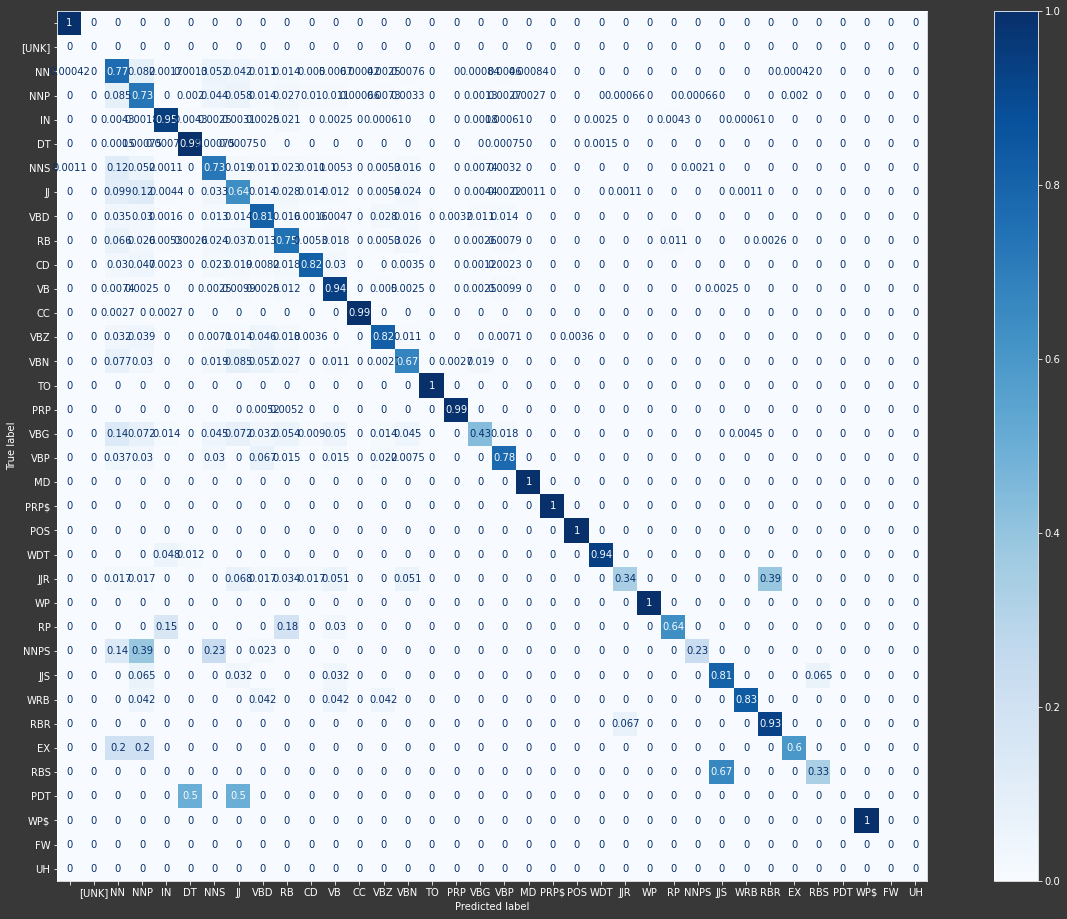

In [54]:
plot_cm(y_true, y_pred_bigru)

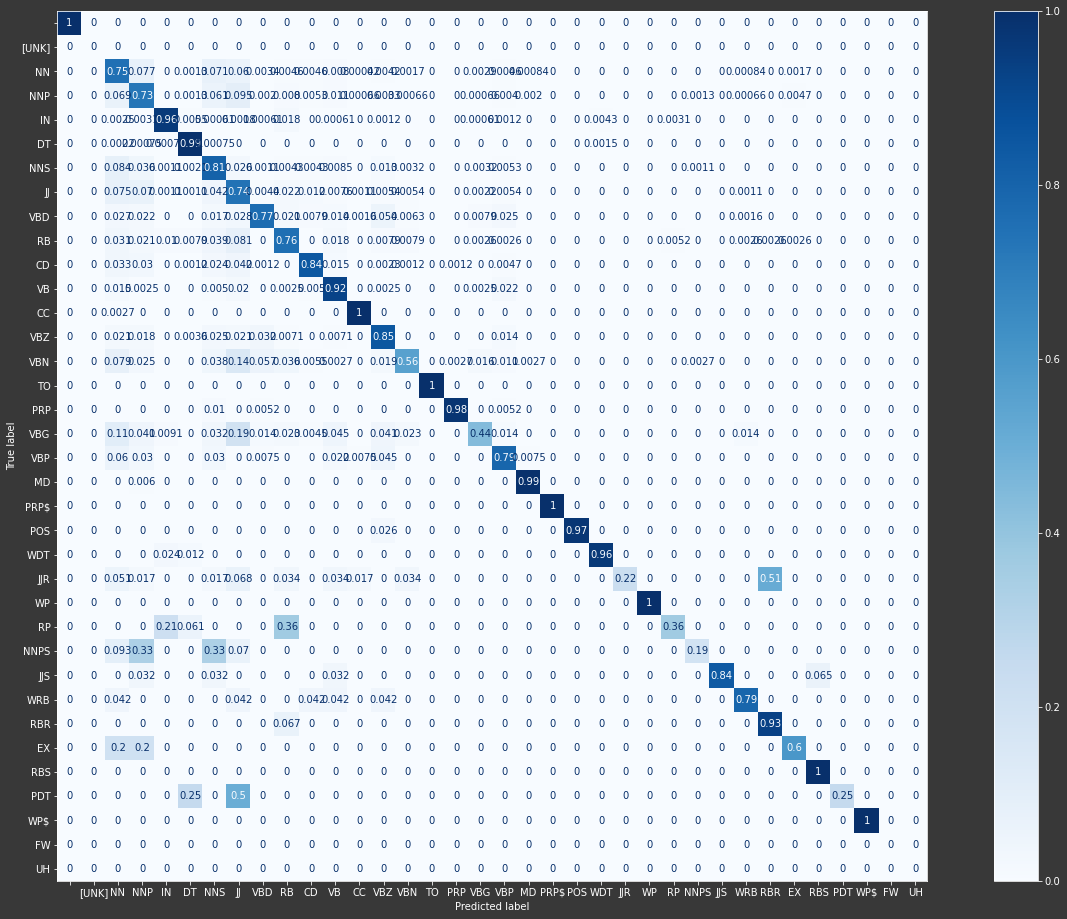

In [55]:
plot_cm(y_true, y_pred_bilstm_stacked)

### Inference Pipeline

The pipeline includes:

- A pre-processing step that takes a piece of text, tokenizes it, and vectorizes the tokens so they're prepared for the model.

- A post-processing step that takes the model's prediction and formats it in an easy to read sequence.

In [56]:
PoS_dict = {
    
    "NN":   "Singular Noun",
    "IN":   "Preposition",
    "NNP":  "Proper Singular Noun",
    "DT":   "Determiner",
    "NNS":  "Plural Noun",
    "JJ":   "Adjective",
    ",":    "Comma",
    ".":    "Dot",
    "CD":   "Cardinal Number",
    "VBD":  "Verb, Past Tense",
    "RB":   "Adverb",
    "VB":   "Verb, Base Form",
    "CC":   "Coordinating Conjunction",
    "TO":   "To",
    "VBN":  "Verb, Past Participle",
    "VBZ":  "Verb, Present Tense, 3rd Person Singular",
    "PRP":  "Personal Pronoun",
    "VBG":  "Verb, Gerund",
    "VBP":  "Verb, Present Tense, 3rd Person Plural",
    "MD":   "Modal",
    "POS":  "Possessive Ending",
    "PRP$": "Possessive Pronoun",
    "$":    "$",
    "``":   "``",
    "''":   "''",
    ":":    "Punctuation",
    "WDT":  "Wh-Determiner",
    "JJR":  "Adjective, Comparative",
    "NNPS": "Proper Plural Noun",
    "WP":   "Wh-Pronoun",
    "RP":   "Particle",
    "JJS":  "Adjective, Superlative",
    "WRB":  "Wh-Adverb",
    "RBR":  "Adverb, Comparative",
    "-RRB-":  ")",
    "-LRB-":  "(",
    "EX":     "Existential 'There'",
    "RBS":    "Adverb, Superlative",
    "PDT":    "Predeterminer",
    "#":      "#",
    "WP$":    "Possessive Wh-Pronoun",
    "LS":     "List Marker",
    "FW":     "Foregin Word",
    "UH":     "Interjection",
    "SYM":    "Symbol"
}

In [57]:
def infer_pos(model, text):

  # Add whitespace around punctuation
  punctuation_regex = "([{\[\(\)\]}.,?!;:'#$])"
  text = re.sub(punctuation_regex, r" \1 ", text)
  text = re.sub("\s{2,}", " ", text)
  text = text.strip()

  # Tokenize the text on whitespace
  text = text.split(" ")

  # Vectorize the tokens and prepare them for the model
  tokenized_text = tokens_vectorize_layer(text).numpy().reshape(1, -1)
  
  # Compute the model's prediction
  y_pred = model.predict(tokenized_text)
  y_pred = np.argmax(y_pred, axis=2)[0]

  # Post-processing of PoS tags
  pos_tags = []
  for id in y_pred:
    pos_tags.append(tags_vocabulary[id])

  # Print the predicted PoS 
  print("_" * 60)
  print(f"Token\t\tPoS\tDescription")
  print("-" * 60)
  
  for token, tag in zip(text, pos_tags):
    print(f"{token}\t\t{tag}\t{PoS_dict[tag]}")
  print("_" * 60)

In [66]:
infer_pos(model_bigru, "Sarah calls the boss.")

1/1 [==============================] - 0s 48ms/step
____________________________________________________________
Token		PoS	Description
------------------------------------------------------------
Sarah		NNP	Proper Singular Noun
calls		VB	Verb, Base Form
the		DT	Determiner
boss		NN	Singular Noun
.		.	Dot
____________________________________________________________
